## import dependencies

In [108]:
import numpy as np
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler
from xgboost import XGBClassifier as xgbc
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

## Data Preprocessing

In [109]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55046 entries, 0 to 55045
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55046 non-null  object 
 1   age                  55046 non-null  float64
 2   hypertension         55045 non-null  float64
 3   heart_disease        55045 non-null  float64
 4   smoking_history      55045 non-null  object 
 5   bmi                  55045 non-null  float64
 6   HbA1c_level          55045 non-null  float64
 7   blood_glucose_level  55045 non-null  float64
 8   diabetes             55045 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.8+ MB


In [111]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,55046.000000,55045.000000,55045.000000,55045.000000,55045.000000,55045.000000,55045.000000
mean,41.869806,0.074921,0.038895,27.331405,5.528188,137.928677,0.086475
std,22.493219,0.263265,0.193348,6.649507,1.071911,40.984804,0.281066
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.600000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [112]:
data.isna().sum()

gender                 0
age                    0
hypertension           1
heart_disease          1
smoking_history        1
bmi                    1
HbA1c_level            1
blood_glucose_level    1
diabetes               1
dtype: int64

In [113]:
data.dropna(inplace=True)

In [114]:
data.duplicated().sum()

1251

In [115]:
data.drop_duplicates(inplace=True)

In [116]:
encoder = LabelEncoder()

def label_encode(sample_data):
  cols = data.select_dtypes(include=['object']).columns
  for col in cols:
    encoder.fit(data[col])
    data[col] = encoder.transform(data[col])
    print(col, data[col].unique())


In [117]:
label_encode(data)

gender [0 1 2]
smoking_history [4 0 1 3 2 5]


In [118]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0


In [119]:
x = data.iloc[:,1:]
y= data.iloc[:,0]

In [120]:
train ,  test ,ytrain , ytest = train_test_split(x,y,test_size=0.2)

In [121]:
%%capture
xgb = xgbc(n_estimators=500,early_stopping_rounds=10,learning_rate=0.001)
xgb.fit(x,y,eval_set=[(train ,ytrain),(test ,ytest)]);

In [122]:
df = pd.DataFrame(data=xgb.feature_importances_ ,index=xgb.feature_names_in_,columns=['importance of features '])

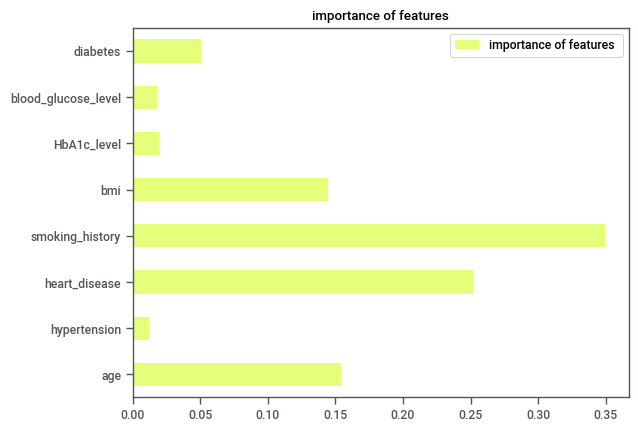

In [123]:
df.plot(kind='barh', title='importance of features',cmap='Wistia')
plt.legend()

## EDA

                                             |          | [  0%]   00:00 -> (? left)


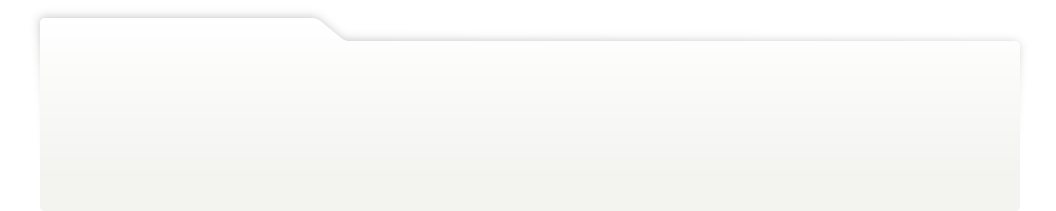
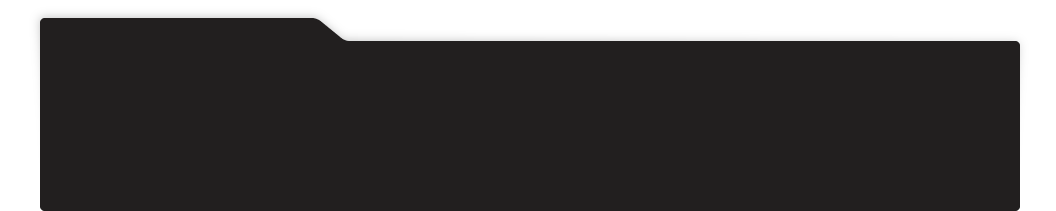
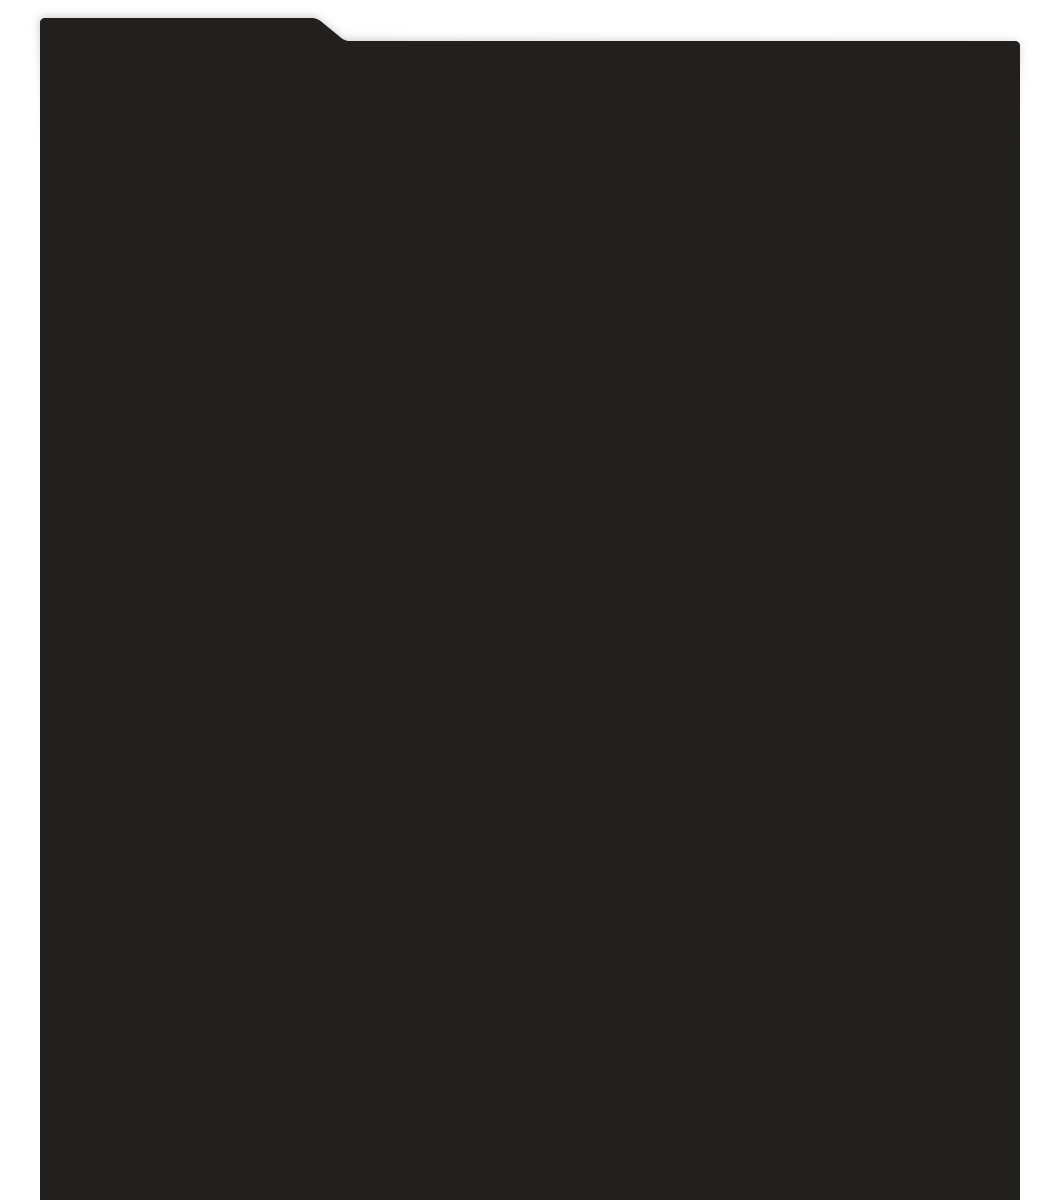
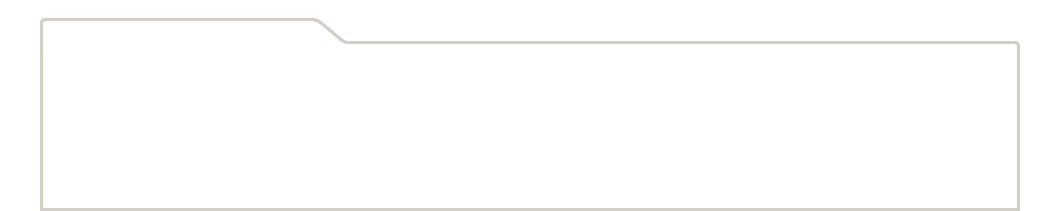
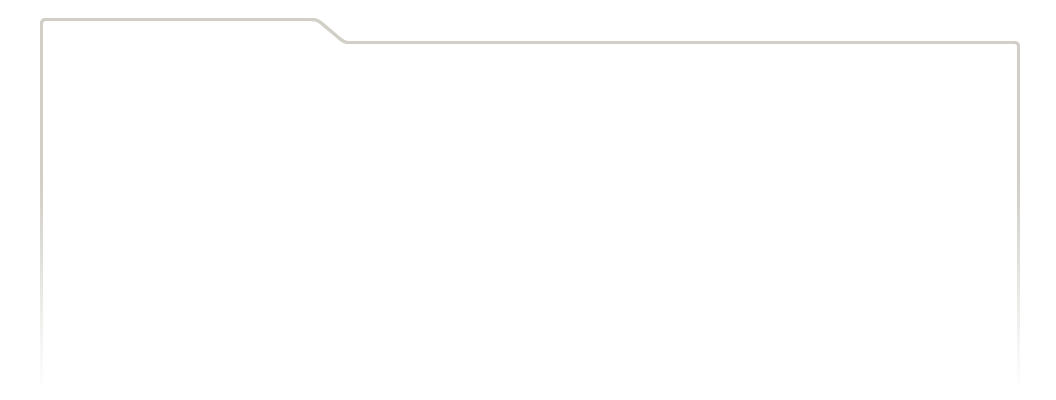
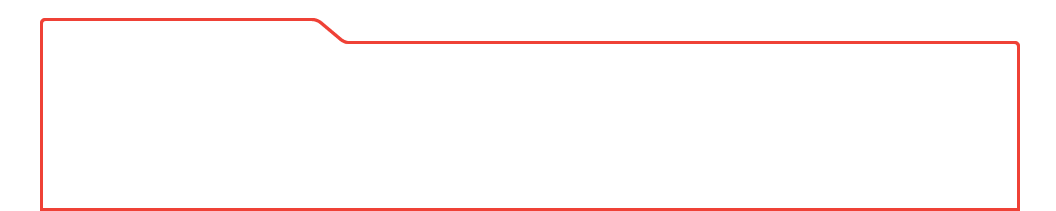
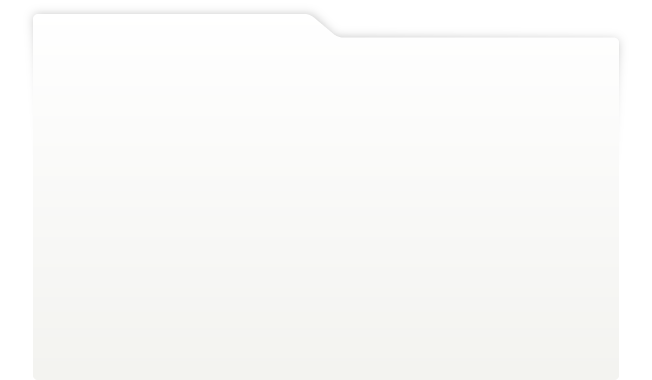
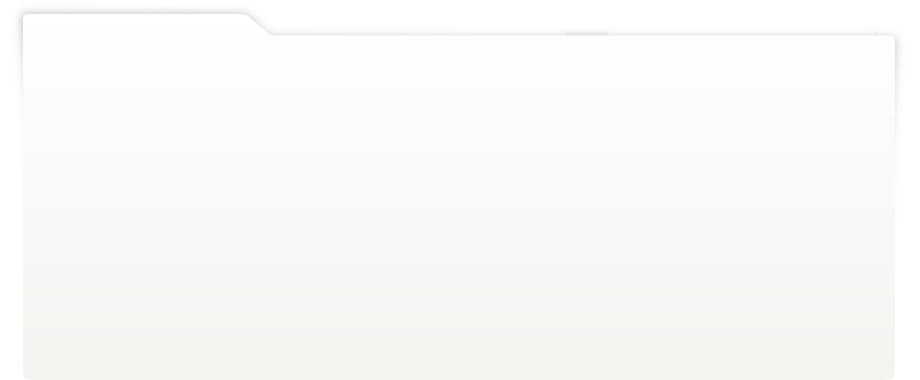
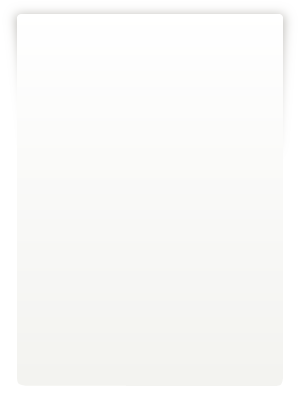
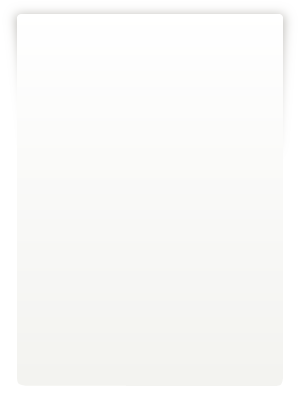
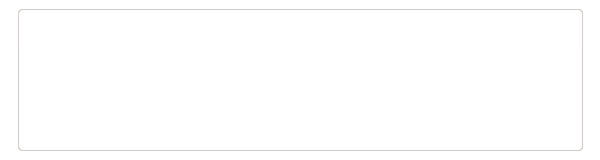
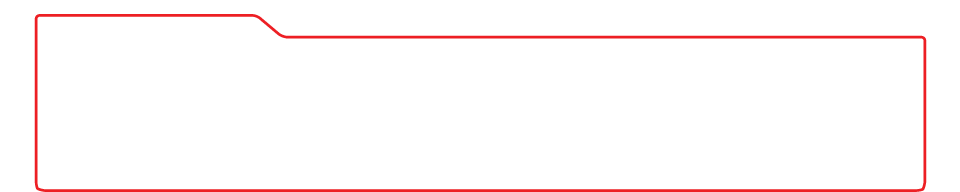
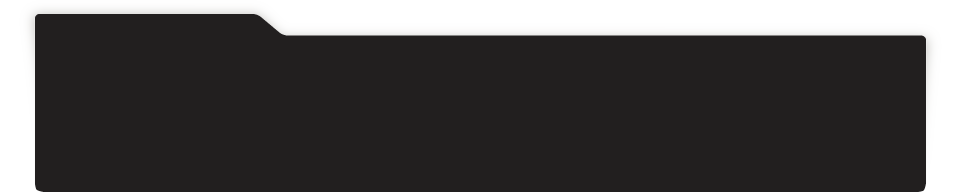
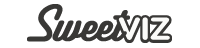
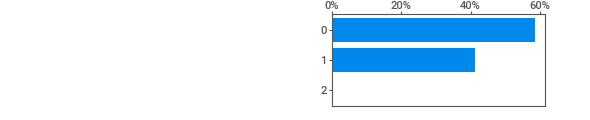
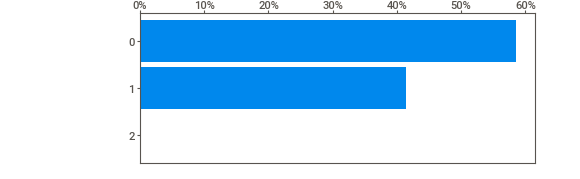
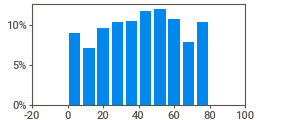
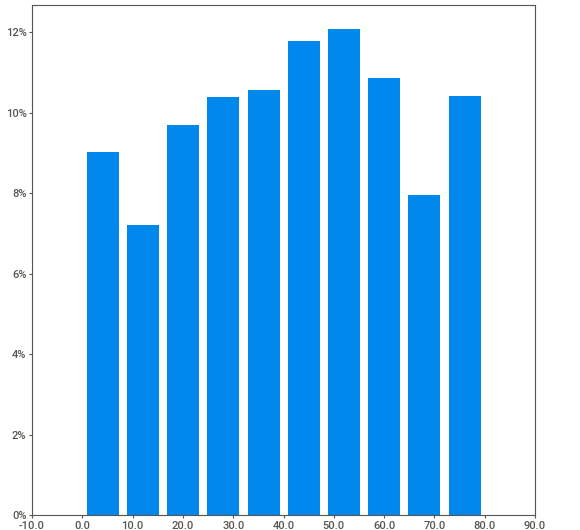
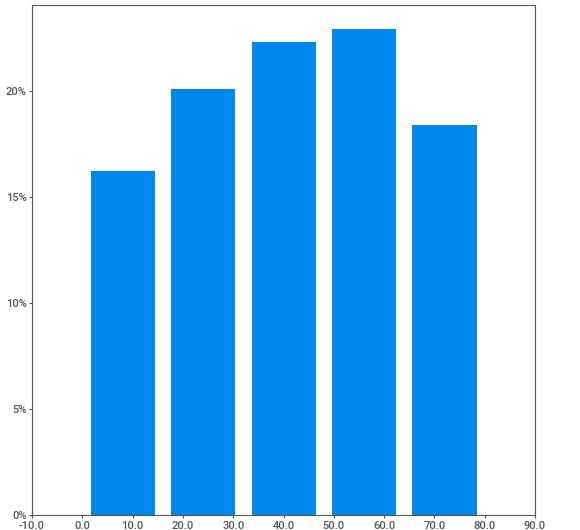
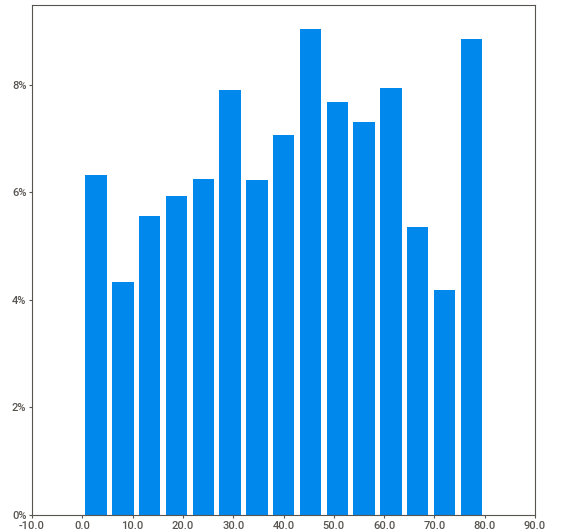
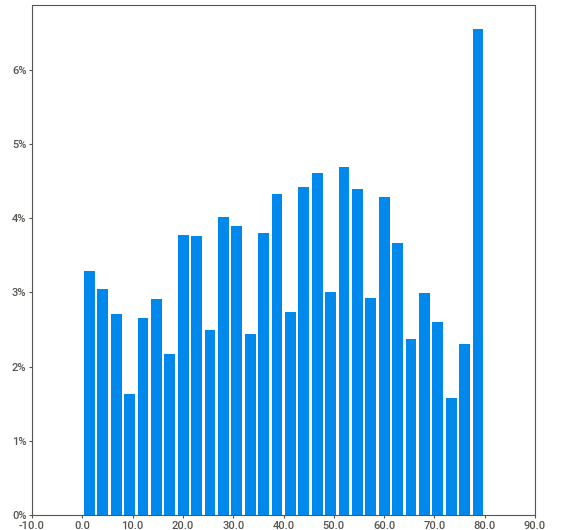
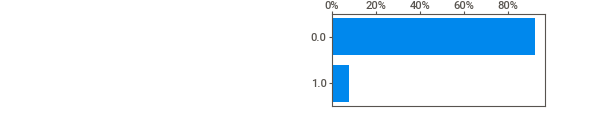
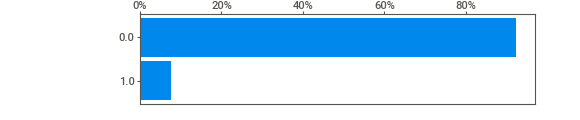
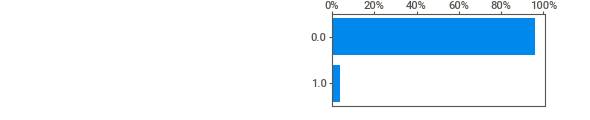
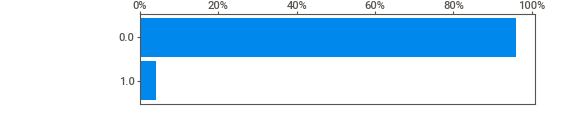
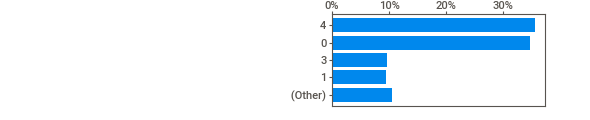
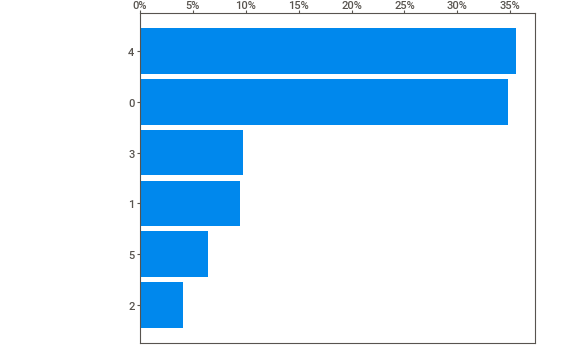
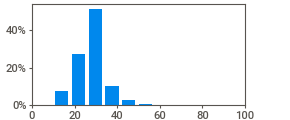
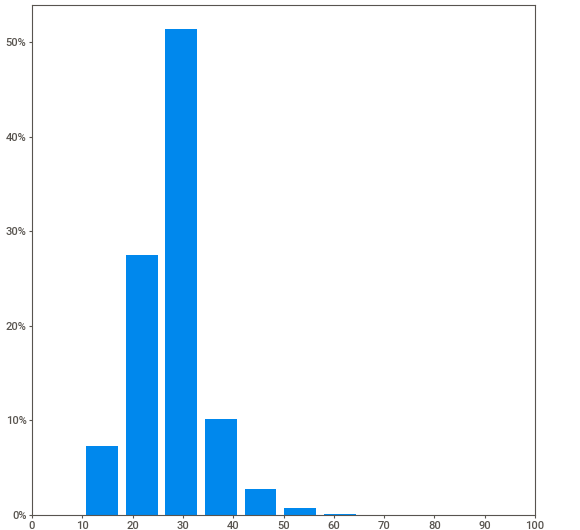
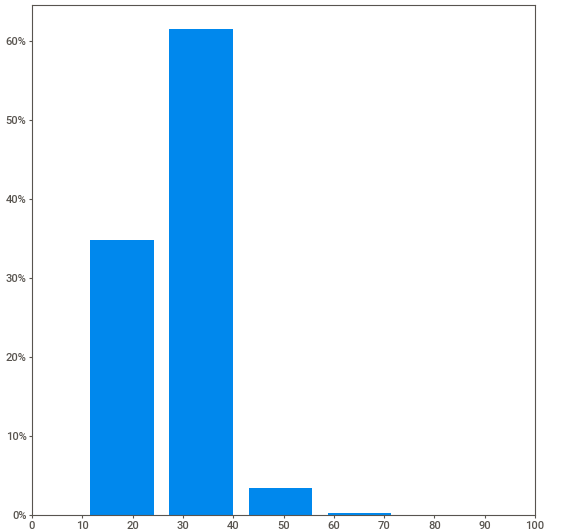
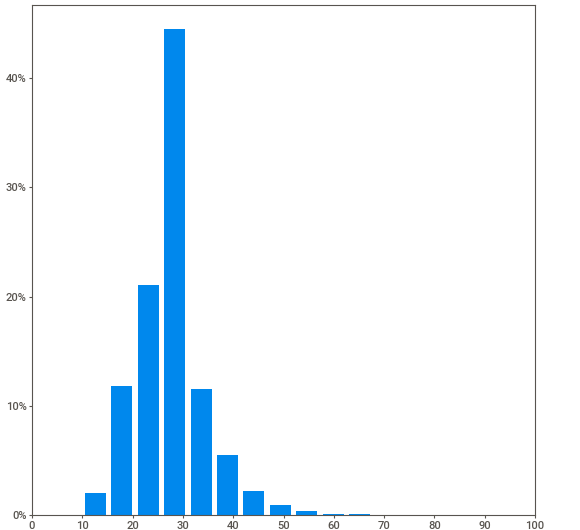
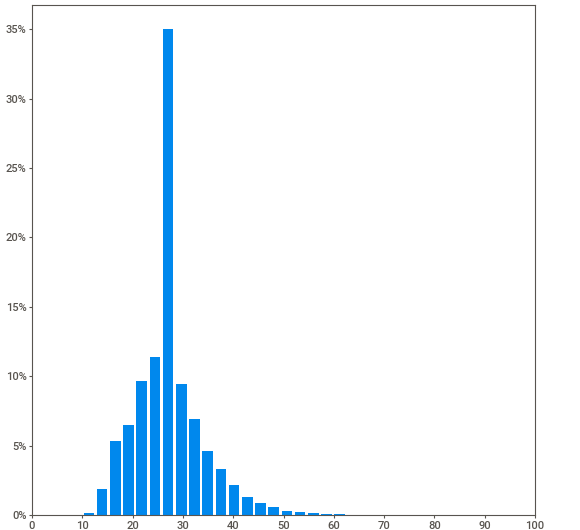
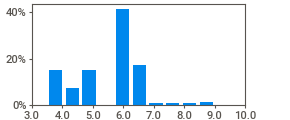
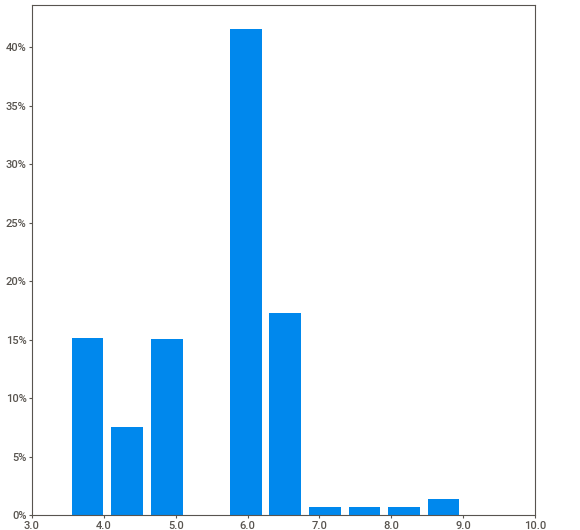
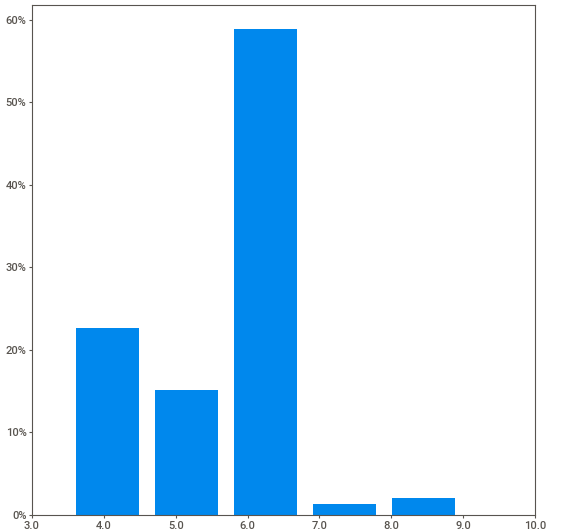
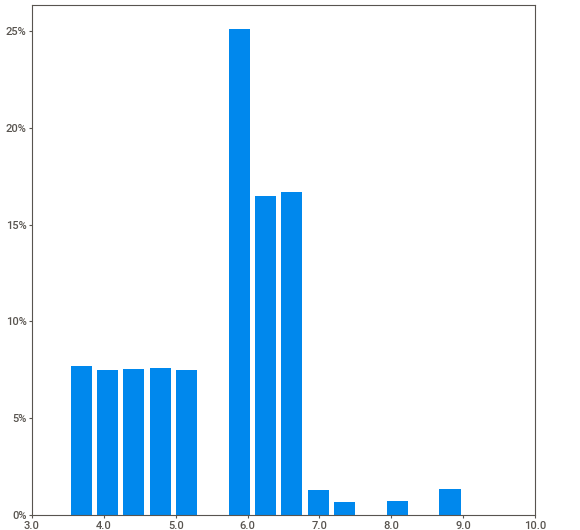
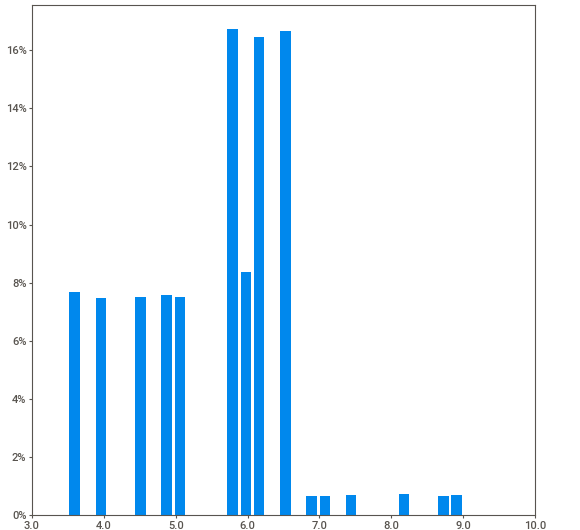
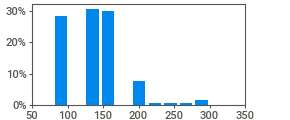
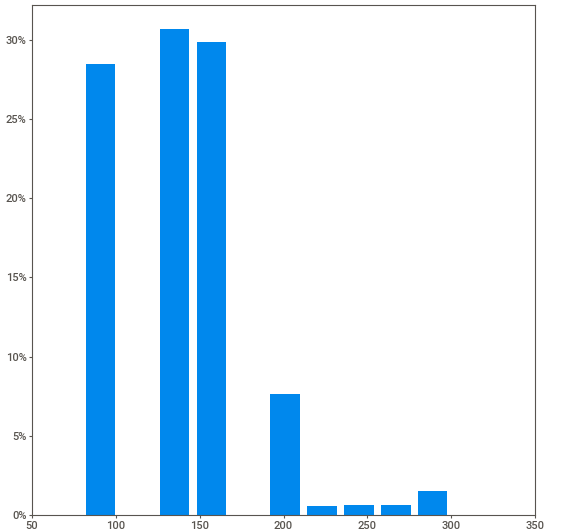
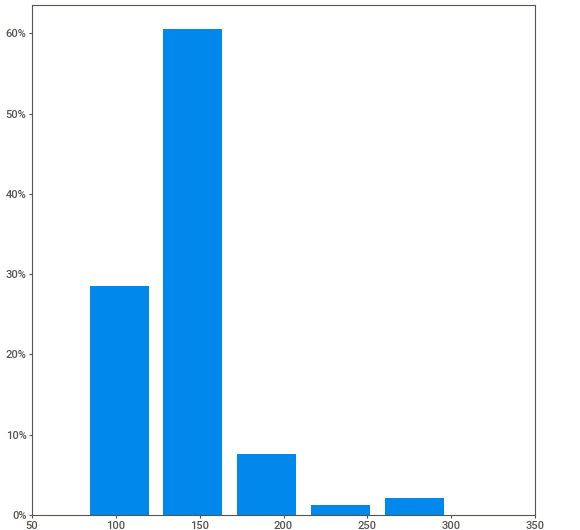
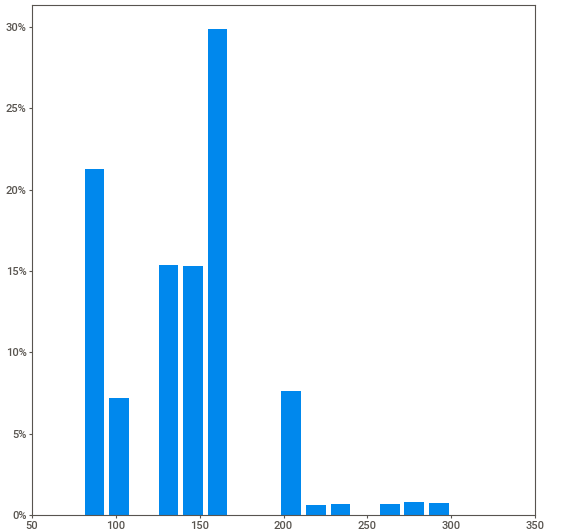
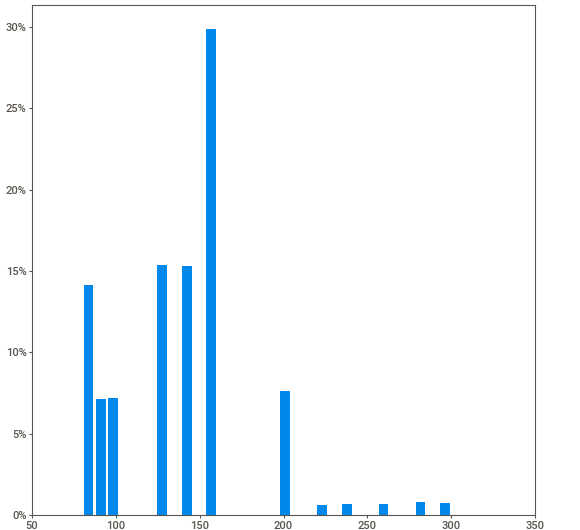
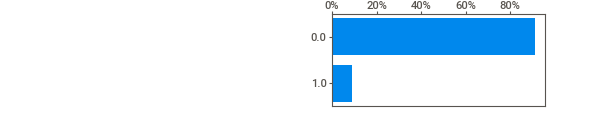
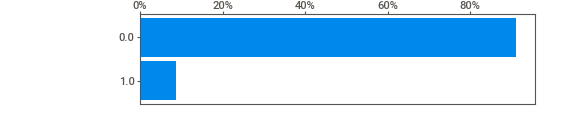
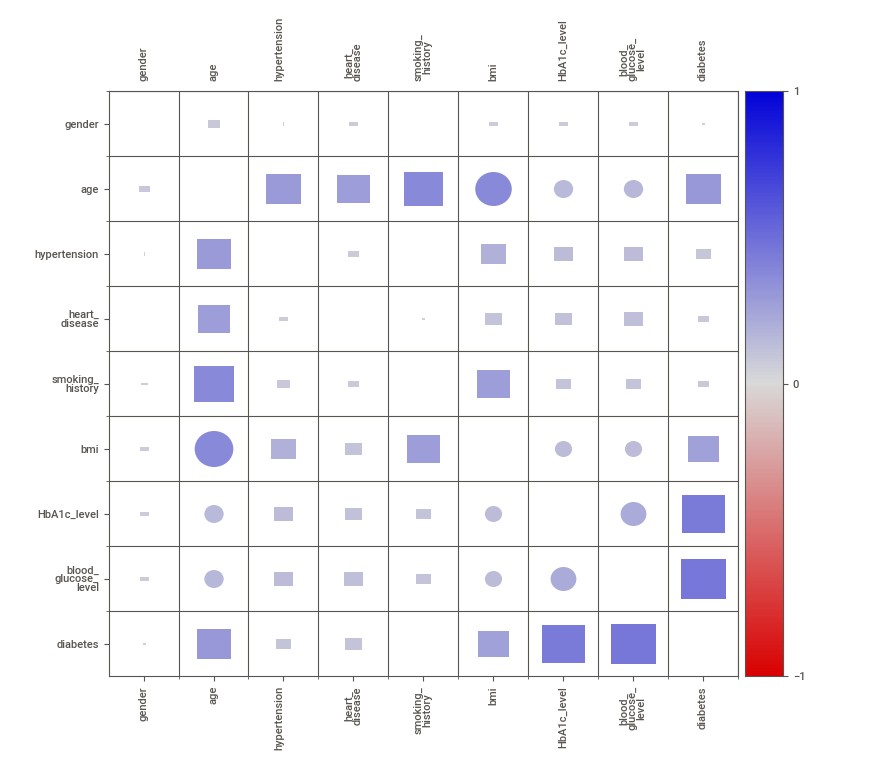
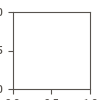

In [124]:
data_report = sv.analyze(data)
data_report.show_notebook()

<Axes: >

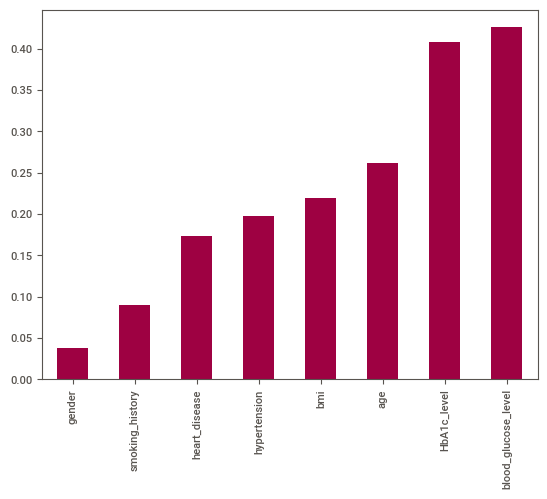

In [125]:
data.corr()['diabetes'][:-1].sort_values().plot(kind='bar',cmap='Spectral')

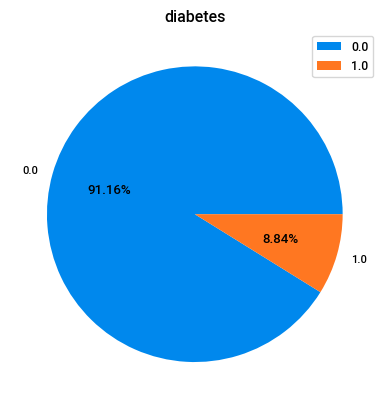

In [126]:
plt.pie(x = data['diabetes'].value_counts(), labels = data['diabetes'].unique(), autopct = '%1.2f%%');plt.title('diabetes')
plt.legend()

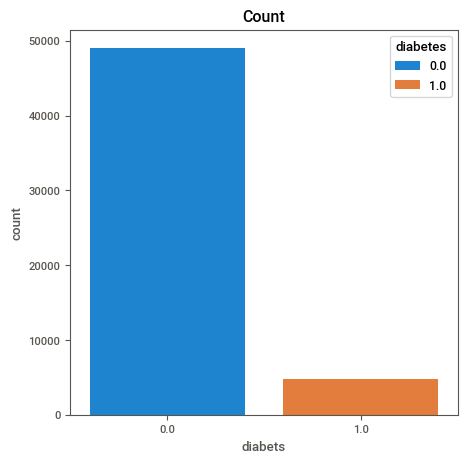

In [127]:
plt.figure(figsize=(5,5))
sns.countplot(x='diabetes', data=data, hue='diabetes');plt.title('Count')
plt.xlabel('diabets')
plt.show()

<Axes: >

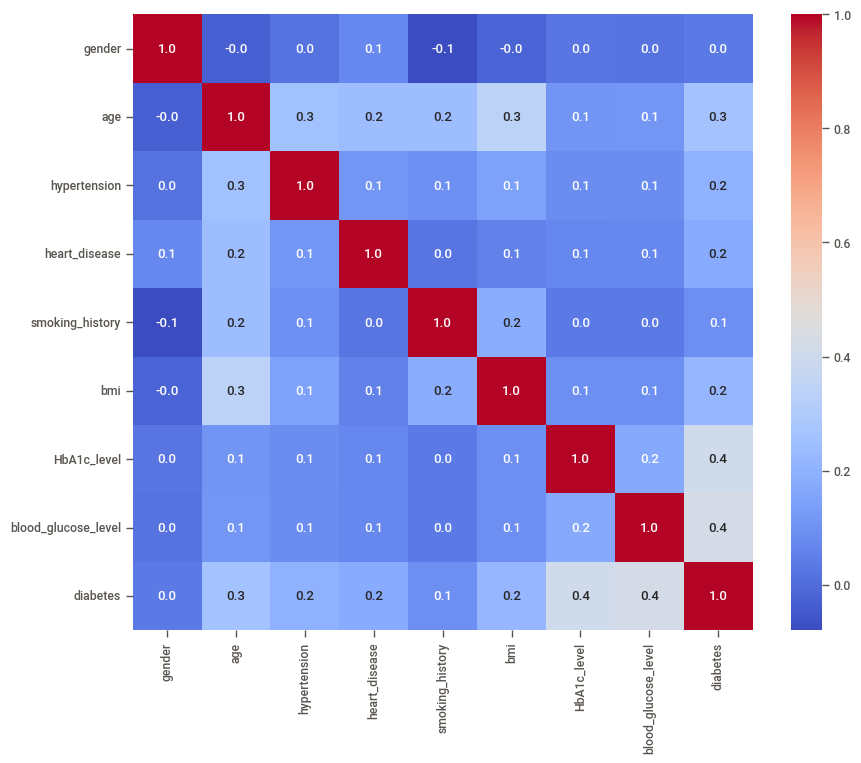

In [128]:
plt.figure(figsize=(10,8))
sns.set_context('paper',font_scale=1)
sns.heatmap(data.corr(),annot=True,fmt=".1f",cmap="coolwarm")

## Data Preprocessing 2

In [129]:
data.shape

(53794, 9)

<Axes: >

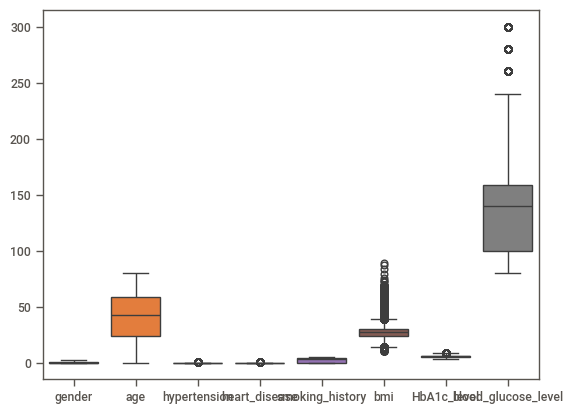

In [130]:
sns.boxplot(data.iloc[:,:-1])

In [134]:
featurers = ['bmi','HbA1c_level',	'blood_glucose_level']
q1 = data[featurers].quantile(0.25)
q3 = data[featurers].quantile(0.75)
IQR = q3 - q1
th_1 = q1 - (1.5 * IQR)
th_2 = q3 + (1.5 * IQR)

<Axes: >

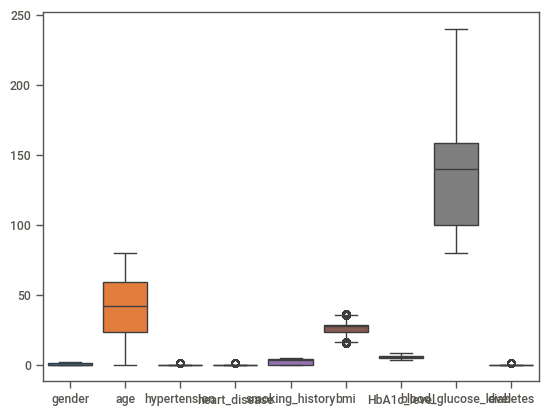

In [135]:
data = data[~((data[featurers] < (th_1)) |(data[featurers] > (th_2))).any(axis=1)]
sns.boxplot(data)

In [136]:
data.shape

(46800, 9)

##  Model Building and evaluation

In [137]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [138]:
X_train.shape

(37440, 8)

### ANN Model

In [139]:
initializer = keras.initializers.HeNormal()
call_back = keras.callbacks.EarlyStopping(patience=2)

In [140]:
model_ann = keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=(8,),kernel_initializer=initializer),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [141]:
model_ann.compile(loss=keras.losses.BinaryCrossentropy(),optimizer='Adam',metrics=['accuracy'])

In [142]:
history = model_ann.fit(X_train,y_train,epochs=30,callbacks=call_back,validation_split=0.2)

Epoch 1/30
936/936 [==============================] - 4s 3ms/step - loss: 0.4436 - accuracy: 0.9366 - val_loss: 0.2079 - val_accuracy: 0.9460
Epoch 2/30
936/936 [==============================] - 4s 4ms/step - loss: 0.1962 - accuracy: 0.9516 - val_loss: 0.2430 - val_accuracy: 0.9460
Epoch 3/30
936/936 [==============================] - 3s 3ms/step - loss: 0.1887 - accuracy: 0.9517 - val_loss: 0.1910 - val_accuracy: 0.9460
Epoch 4/30
936/936 [==============================] - 3s 3ms/step - loss: 0.1820 - accuracy: 0.9517 - val_loss: 0.1875 - val_accuracy: 0.9460
Epoch 5/30
936/936 [==============================] - 2s 3ms/step - loss: 0.1789 - accuracy: 0.9518 - val_loss: 0.1890 - val_accuracy: 0.9460
Epoch 6/30
936/936 [==============================] - 3s 3ms/step - loss: 0.1751 - accuracy: 0.9518 - val_loss: 0.1845 - val_accuracy: 0.9460
Epoch 7/30
936/936 [==============================] - 4s 4ms/step - loss: 0.1731 - accuracy: 0.9518 - val_loss: 0.1827 - val_accuracy: 0.9460
Epoch 

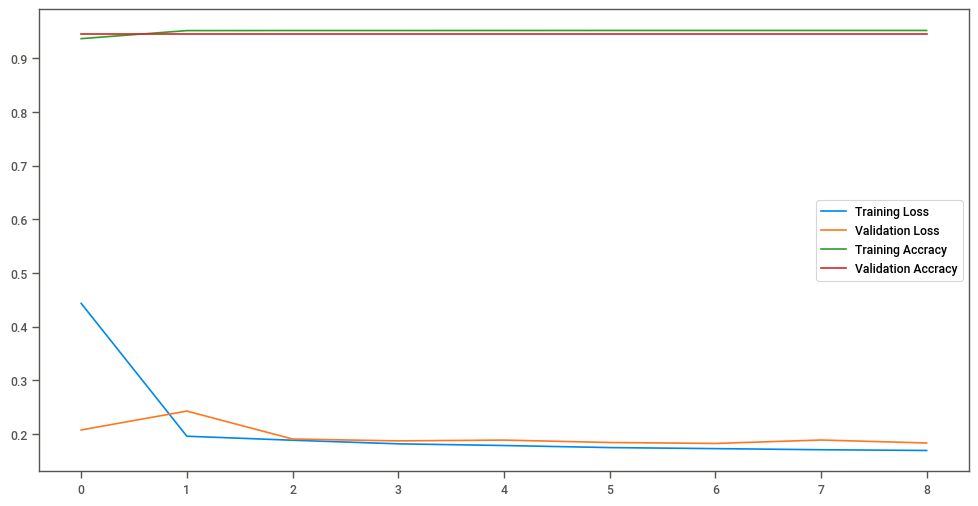

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accracy')
plt.plot(history.history['val_accuracy'], label='Validation Accracy')
plt.legend()
plt.show()

In [144]:
evaluate_model = model_ann.evaluate(X_test, y_test)
evaluate_model

293/293 [==============================] - 1s 2ms/step - loss: 0.1795 - accuracy: 0.9483


[0.17953389883041382, 0.9482905864715576]

In [145]:
ann_pred = model_ann.predict(X_test)

293/293 [==============================] - 1s 3ms/step


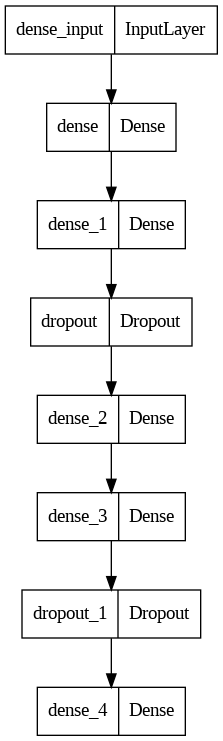

In [48]:
plot_model(model_ann)

### LogisticRegression Model

In [146]:
Logistic_model = LogisticRegression()

In [147]:
Logistic_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
logistic_pred = Logistic_model.predict(X_test)

In [149]:
Logistic_model.score(X_train,y_train)

0.9530448717948717

In [155]:
def plot_test_model(pred_value , actual_value):
  sns.distplot(logistic_pred, color="y", label="Prediction Value",hist=False)
  sns.distplot(y_test,  color="g", label="Actual Value",hist=False)
  plt.legend()
  plt.show()
  print(classification_report(actual_value,pred_value))



<ipython-input-155-8e1e8069e581>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logistic_pred, color="y", label="Prediction Value",hist=False)
<ipython-input-155-8e1e8069e581>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,  color="g", label="Actual Value",hist=False

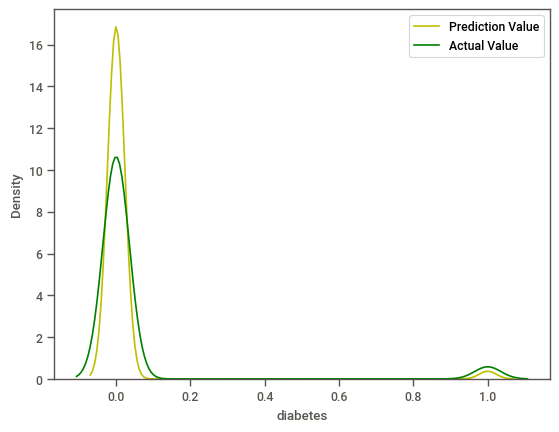

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8876
         1.0       0.54      0.22      0.31       484

    accuracy                           0.95      9360
   macro avg       0.75      0.61      0.64      9360
weighted avg       0.94      0.95      0.94      9360



In [156]:
plot_test_model(pred_value=logistic_pred , actual_value= y_test)

In [152]:
log_pred = Logistic_model.predict(X_test)
log_pred_proba = Logistic_model.predict_proba(X_test)[::,1]

In [153]:
def plot_roc_curve(y_pred , y_actual,acc):
  fpr, tpr, _ = roc_curve(y_actual, y_pred)
  auc = roc_auc_score(y_actual, y_pred)
  plt.figure(figsize=(8,6))
  plt.plot(fpr,tpr,label=f"Logistic Regression (accuracy ='{acc}' )" % auc)
  plt.legend(loc='lower right')
  plt.xlabel('FPR', size = 20)
  plt.ylabel('TPR', size = 20)
  plt.title("Receiver Operatinng Characteristics", size = 25)
  plt.plot([0, 1], [0, 1],'r--')
  plt.legend(loc='lower right')
  plt.show()


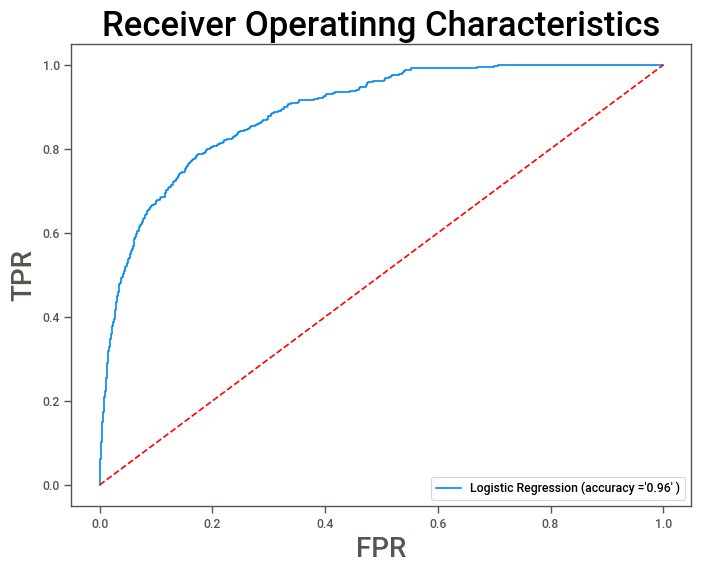

In [154]:
plot_roc_curve(y_pred= log_pred_proba , y_actual= y_test , acc=0.96)

### AdaBoost Model

In [159]:
adaboost_model = AdaBoostClassifier()

In [169]:
param_grid = {
    'n_estimators' : [25,50,100],
    'learning_rate' : [1.0,0.1],
    'random_state': [0,42]
}

In [170]:
grid = GridSearchCV(adaboost_model, param_grid, cv=3, verbose=1,scoring='accuracy')

In [171]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.0, 0.1],
                         'n_estimators': [25, 50, 100],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=1)

In [172]:
print(grid.best_params_)

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}


In [173]:
adaboost = AdaBoostClassifier(learning_rate=0.1,n_estimators=50,random_state=0)

In [174]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=0)

In [175]:
print(adaboost.score(X_train,y_train))

0.9741720085470086


In [176]:
adaboost_pred = adaboost.predict(X_test)
adaboost_pred_proba = adaboost.predict_proba(X_test)[::,1]

<ipython-input-155-8e1e8069e581>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logistic_pred, color="y", label="Prediction Value",hist=False)
<ipython-input-155-8e1e8069e581>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,  color="g", label="Actual Value",hist=False

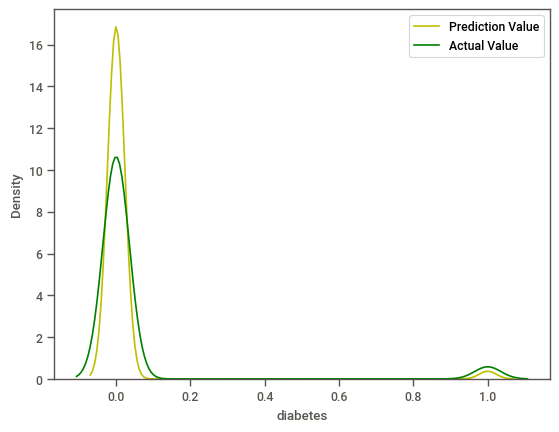

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      8876
         1.0       1.00      0.48      0.65       484

    accuracy                           0.97      9360
   macro avg       0.99      0.74      0.82      9360
weighted avg       0.97      0.97      0.97      9360



In [177]:
plot_test_model(pred_value=adaboost_pred , actual_value=y_test)

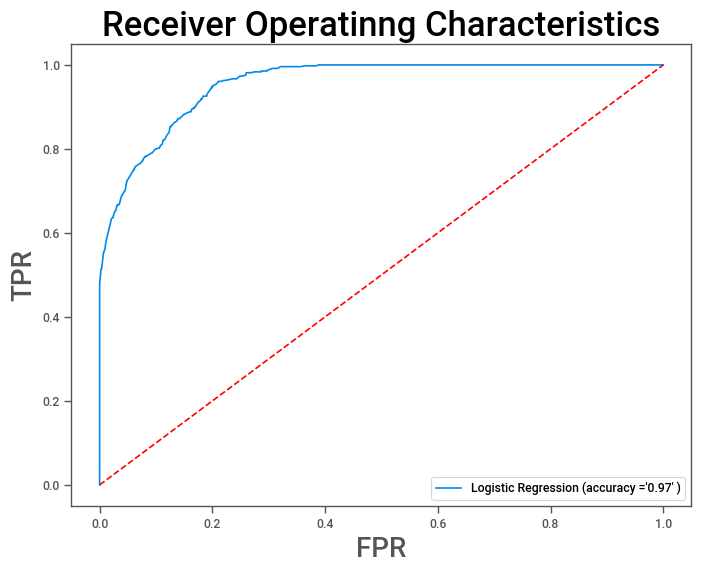

In [178]:
plot_roc_curve(y_pred= adaboost_pred_proba , y_actual= y_test , acc=0.97)

## all models have better results when there is enough data